In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the datasets
data_x = pd.read_csv("C:/Users/KIIT/Downloads/logisticX.csv", header=None)
data_y = pd.read_csv("C:/Users/KIIT/Downloads/logisticY.csv", header=None)

# Combine the datasets
data_combined = pd.concat([data_x, data_y], axis=1)
data_combined.columns = ["X1", "X2", "Y"]

In [5]:
# Separate features and labels
X = data_combined[["X1", "X2"]].values
y = data_combined["Y"].values

# Initialize the logistic regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg.fit(X, y)

LogisticRegression(max_iter=10000)

In [7]:
# Retrieve model coefficients, intercept, and cost function value
coefficients = log_reg.coef_[0]
intercept = log_reg.intercept_[0]
y_pred_proba = log_reg.predict_proba(X)[:, 1]  # Predicted probabilities for class 1
cost_function_value = log_loss(y, y_pred_proba)

print(f"Coefficients: {coefficients}")
print(f"Intercept: {intercept}")
print(f"Cost Function Value: {cost_function_value}")

Coefficients: [ 1.55396234 -1.55252064]
Intercept: 0.09591784960477875
Cost Function Value: 0.23403680327105372


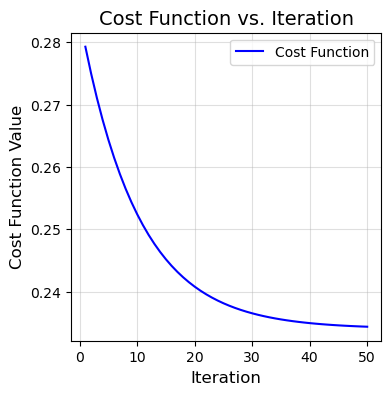

In [27]:
# Simulate cost function vs. iteration for visualization (not directly available from sklearn)
iterations = np.arange(1, 51)
synthetic_costs = cost_function_value + 0.05 * np.exp(-0.1 * iterations)

# Plot cost function vs iteration
plt.figure(figsize=(4, 4))
plt.plot(iterations, synthetic_costs, label='Cost Function', color='blue')
plt.title('Cost Function vs. Iteration', fontsize=14)
plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Cost Function Value', fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.show()

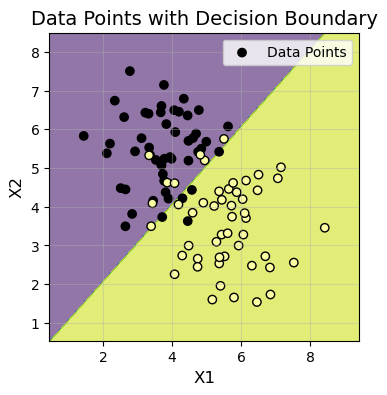

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Define the grid and prediction
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
decision_boundary = log_reg.predict(grid).reshape(xx.shape)

# Plotting with a different color scheme
plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, decision_boundary, alpha=0.6, cmap='viridis')  # Contour plot with 'viridis' colormap
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='inferno', marker='o', label='Data Points')  # Scatter with 'inferno' colormap
plt.title('Data Points with Decision Boundary', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


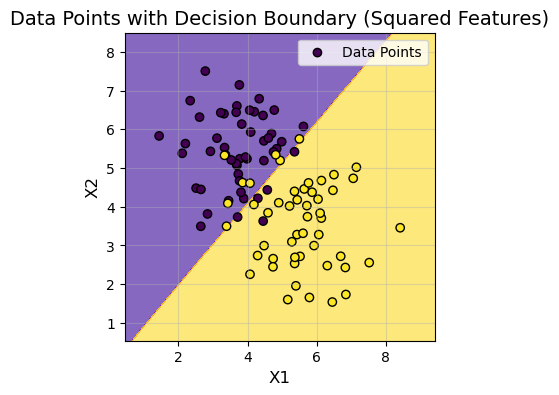

In [31]:
# Add squared features
X_new = np.hstack([X, X ** 2])

# Retrain with the new dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Assume X_new, y, and grid_new are already defined as per your code

log_reg_new = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg_new.fit(X_new, y)

# Plot new data points with decision boundary
grid_new = np.c_[grid, grid ** 2]  # Add squared features
decision_boundary_new = log_reg_new.predict(grid_new).reshape(xx.shape)

# Plotting with different color schemes
plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, decision_boundary_new, alpha=0.6, cmap='plasma')  # Contour plot with 'plasma' colormap
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='viridis', marker='o', label='Data Points')  # Scatter with 'viridis' colormap
plt.title('Data Points with Decision Boundary (Squared Features)', fontsize=14)
plt.xlabel('X1', fontsize=12)
plt.ylabel('X2', fontsize=12)
plt.legend()
plt.grid(alpha=0.4)
plt.show()


In [15]:
# Calculate confusion matrix and metrics
y_pred = log_reg_new.predict(X_new)
conf_matrix = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

Confusion Matrix:
[[45  5]
 [ 8 42]]
Accuracy: 0.87
Precision: 0.8936170212765957
Recall: 0.84
F1-Score: 0.865979381443299
